In [5]:
import albumentations as A
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Reference
https://github.com/albumentations-team/albumentations

## 1. Original Image

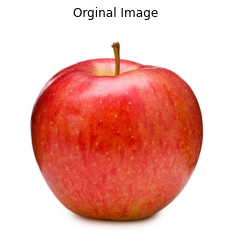

In [3]:
image = cv2.imread("/nas001/users/jw.lee/vision_example/apple.jpg", 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()

## 2. Pixel-level Transforms

### (1) Blur

In [36]:
transform = A.Compose([
    A.GaussianBlur(blur_limit=(31, 41)),
])

augmentations = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

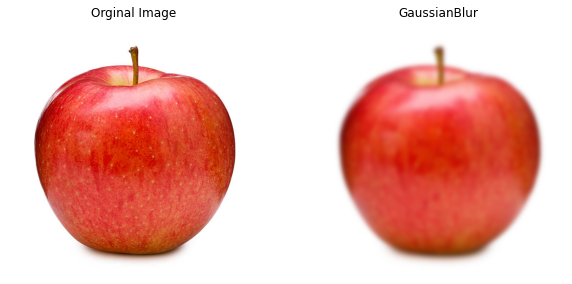

In [37]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(augmentations, cv2.COLOR_BGR2RGB))
ax2.set_title('GaussianBlur')
ax2.axis("off")


### (2) Noise

In [73]:
transform = A.Compose([
    A.GaussNoise(var_limit=(10.0, 30.0), mean=50, per_channel=True, always_apply=True, p=0.5),
])

augmentations = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

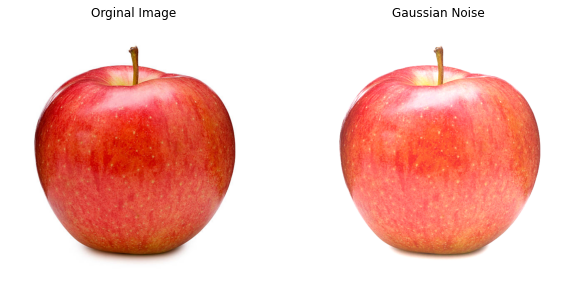

In [74]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(augmentations, cv2.COLOR_BGR2RGB))
ax2.set_title('Gaussian Noise')
ax2.axis("off")


### (3) CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [84]:
transform = A.Compose([
    A.CLAHE(clip_limit=3.0, tile_grid_size=(8, 8), always_apply=True, p=0.5),
])

augmentations = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

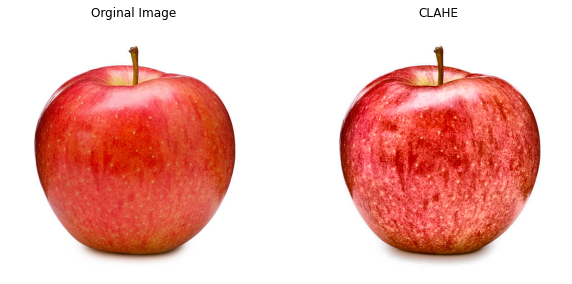

In [85]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(augmentations, cv2.COLOR_BGR2RGB))
ax2.set_title('CLAHE')
ax2.axis("off")

### (4) Channel Shuffle

In [122]:
transform = A.Compose([
    A.ChannelShuffle(always_apply=True, p=0.5),
])

augmentations1 = transform(image=image)['image']
augmentations2 = transform(image=image)['image']


(-0.5, 611.5, 611.5, -0.5)

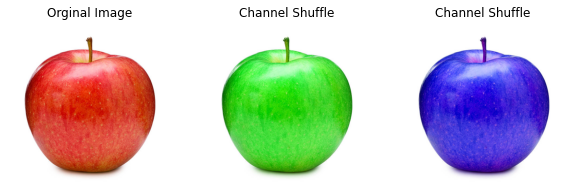

In [123]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(cv2.cvtColor(augmentations1, cv2.COLOR_BGR2RGB))
ax2.set_title('Channel Shuffle')
ax2.axis("off")

ax2 = fig.add_subplot(1, 3, 3)
ax2.imshow(cv2.cvtColor(augmentations2, cv2.COLOR_BGR2RGB))
ax2.set_title('Channel Shuffle')
ax2.axis("off")

### (5) Downscale

In [166]:
transform = A.Compose([
    A.Downscale(scale_min=0.1, scale_max=0.1, interpolation=0, always_apply=True, p=0.5),
])

augmentations = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

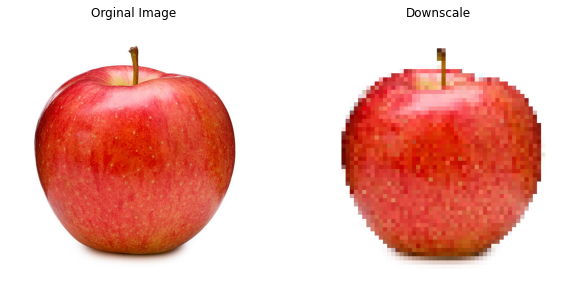

In [167]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(augmentations, cv2.COLOR_BGR2RGB))
ax2.set_title('Downscale')
ax2.axis("off")

### (6) Fancy PCA

In [186]:
transform = A.Compose([
    A.FancyPCA(alpha=0.3, always_apply=True, p=0.5),
])

augmentations = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

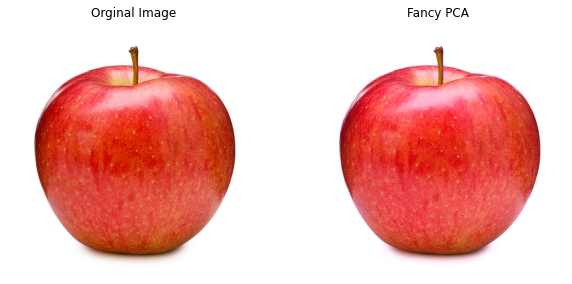

In [188]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(augmentations, cv2.COLOR_BGR2RGB))
ax2.set_title('Fancy PCA')
ax2.axis("off")

### (7) RandomRain

In [153]:
transform = A.Compose([
    A.RandomRain (slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=7, brightness_coefficient=1, rain_type=None, always_apply=True, p=0.5),
])

augmentations = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

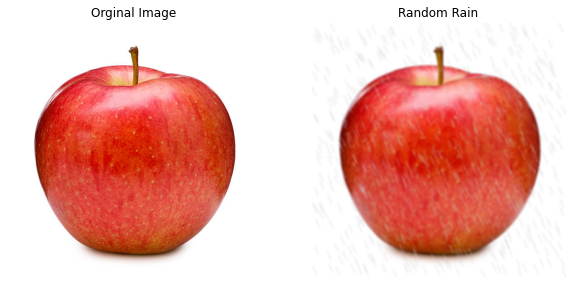

In [154]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(cv2.cvtColor(augmentations, cv2.COLOR_BGR2RGB))
ax2.set_title('Random Rain')
ax2.axis("off")

## 3. Spatial-level Transforms

### (1) Flip

In [192]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    
])

augmentations1 = transform(image=image)['image']
augmentations2 = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

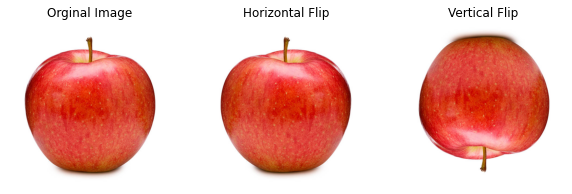

In [193]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(cv2.cvtColor(augmentations1, cv2.COLOR_BGR2RGB))
ax2.set_title('Horizontal Flip')
ax2.axis("off")

ax2 = fig.add_subplot(1, 3, 3)
ax2.imshow(cv2.cvtColor(augmentations2, cv2.COLOR_BGR2RGB))
ax2.set_title('Vertical Flip')
ax2.axis("off")

### (2) Rotate

In [220]:
transform = A.Compose([
    A.RandomRotate90(p=1),
    
])

augmentations1 = transform(image=image)['image']
augmentations2 = transform(image=image)['image']
augmentations3 = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

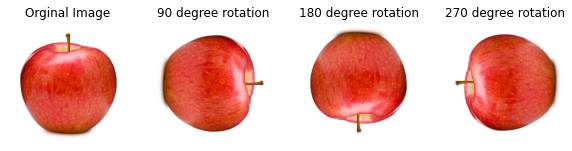

In [222]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(cv2.cvtColor(augmentations2, cv2.COLOR_BGR2RGB))
ax2.set_title('90 degree rotation')
ax2.axis("off")

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(cv2.cvtColor(augmentations1, cv2.COLOR_BGR2RGB))
ax3.set_title('180 degree rotation')
ax3.axis("off")

ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(cv2.cvtColor(augmentations3, cv2.COLOR_BGR2RGB))
ax4.set_title('270 degree rotation')
ax4.axis("off")

### (3) Crop

In [235]:
transform = A.Compose([
    A.RandomResizedCrop(image.shape[0], image.shape[1], scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1, always_apply=False, p=1.0),
    
])

augmentations1 = transform(image=image)['image']
augmentations2 = transform(image=image)['image']
augmentations3 = transform(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

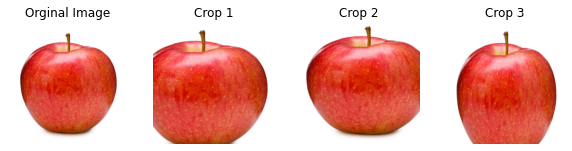

In [236]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(cv2.cvtColor(augmentations2, cv2.COLOR_BGR2RGB))
ax2.set_title('Crop 1')
ax2.axis("off")

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(cv2.cvtColor(augmentations1, cv2.COLOR_BGR2RGB))
ax3.set_title('Crop 2')
ax3.axis("off")

ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(cv2.cvtColor(augmentations3, cv2.COLOR_BGR2RGB))
ax4.set_title('Crop 3')
ax4.axis("off")

### (4) Distortion

In [326]:
transform1 = A.Compose([
    A.GridDistortion(distort_limit=0.3, p=1),
])

transform2 = A.Compose([
    A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1),
])

transform3 = A.Compose([
    A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=1),
])

augmentations1 = transform1(image=image)['image']
augmentations2 = transform2(image=image)['image']
augmentations3 = transform3(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

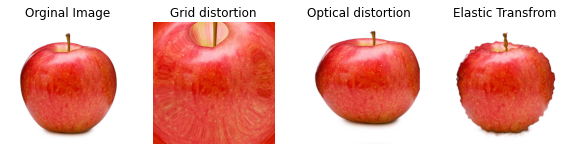

In [327]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(cv2.cvtColor(augmentations2, cv2.COLOR_BGR2RGB))
ax2.set_title('Grid distortion')
ax2.axis("off")

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(cv2.cvtColor(augmentations1, cv2.COLOR_BGR2RGB))
ax3.set_title('Optical distortion')
ax3.axis("off")

ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(cv2.cvtColor(augmentations3, cv2.COLOR_BGR2RGB))
ax4.set_title('Elastic Transfrom')
ax4.axis("off")

### (5) Dropout

In [375]:
transform1 = A.Compose([
    A.PixelDropout(dropout_prob=0.3, per_channel=False, drop_value=255, mask_drop_value=None, always_apply=False, p=1),
    
])

transform2 = A.Compose([
    A.CoarseDropout(max_holes=80, max_height=40, max_width=20, min_holes=50, min_height=10, min_width=5, fill_value=255, mask_fill_value=None, always_apply=False, p=0.5),
])



augmentations1 = transform1(image=image)['image']
augmentations2 = transform2(image=image)['image']

(-0.5, 611.5, 611.5, -0.5)

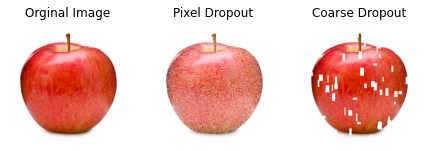

In [376]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Orginal Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(cv2.cvtColor(augmentations1, cv2.COLOR_BGR2RGB))
ax2.set_title('Pixel Dropout')
ax2.axis("off")

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(cv2.cvtColor(augmentations2, cv2.COLOR_BGR2RGB))
ax3.set_title('Coarse Dropout')
ax3.axis("off")